In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 50)

# Use this to see how much memory the dataframes use
from sys import getsizeof

from vivarium_research_prl import datatypes
from vivarium_research_prl.noise import corruption, fake_names, noisify
from vivarium_research_prl.find_kids import datasets, noisify_data

!date
!whoami
!uname -a
!pwd

Fri 10 Mar 2023 01:52:28 PM PST
ndbs
Linux int-slurm-sarchive-p0005 5.4.0-135-generic #152-Ubuntu SMP Wed Nov 23 20:19:22 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/ndbs/vivarium_research_prl/model_validation


In [146]:
pd.set_option('display.max_rows', 50)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def sizemb(obj, mib=False):
    mb = 1024**2 if mib else 1e6
    return getsizeof(obj) / mb

# Find results

In [5]:
project_output_dir = \
    '/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop'
output_subdir = (
    'results/vv_tax_observers'
    '/united_states_of_america/2023_03_06_12_42_55'
    '/final_results/2023_03_06_16_21_11'
)
output_dir = f'{project_output_dir}/{output_subdir}'

!ls -halt $output_dir

total 13G
drwxrwsr-x 11 albrja IHME-Simulationscience 5.0K Mar 10 10:39 ..
-rw-r--r--  1 albrja IHME-Simulationscience 1.5G Mar  6 19:37 tax_dependents_observer.csv.bz2
drwxrwsr-x  2 albrja IHME-Simulationscience 4.0K Mar  6 19:26 .
-rw-r--r--  1 albrja IHME-Simulationscience 4.0G Mar  6 19:23 tax_1040_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 6.7G Mar  6 18:45 tax_w2_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 191M Mar  6 17:57 social_security_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience  58M Mar  6 17:55 wic_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience  34M Mar  6 17:54 household_survey_observer_cps.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 6.5M Mar  6 17:54 household_survey_observer_acs.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 628M Mar  6 17:54 decennial_census_observer.csv.bz2


# Load partial Census data

In [18]:
%%time
print(output_dir)
df_census = pd.read_csv(f'{output_dir}/decennial_census_observer.csv.bz2', nrows=1000)
df_census

/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/vv_tax_observers/united_states_of_america/2023_03_06_12_42_55/final_results/2023_03_06_16_21_11
CPU times: user 41.5 ms, sys: 5.31 ms, total: 46.8 ms
Wall time: 839 ms


,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,age,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number
0,Reference person,3254_0,Allen,3254_-1,MA,2740.0,3254_-1,Male,1960-09-12,59.550114,billerica,T,David,cliffside dr,White,NaN,Standard,NaN
1,Opp-sex spouse,3254_1,Allen,3254_-1,MA,2740.0,3254_-1,Female,1961-07-29,58.674887,billerica,S,Deanna,cliffside dr,White,NaN,Standard,NaN
2,Reference person,3254_2,Dudich,3254_-1,WI,53952.0,3254_-1,Male,1966-12-23,53.272919,milwaukee,T,David,108th ave se,White,14323,Standard,NaN
3,Opp-sex spouse,3254_3,Dudich,3254_-1,WI,53952.0,3254_-1,Female,1965-08-10,54.643021,milwaukee,T,Dawn,108th ave se,White,14323,Standard,NaN
4,Reference person,3254_4,Jones,3254_-1,MD,21239.0,3254_-1,Female,1964-08-09,55.642824,nrt beach,T,Deanna,ne 7th ave,Black,358,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Reference person,3254_995,Matlock,3254_-1,AZ,85382.0,3254_-1,Female,1936-09-24,83.518744,tucson,F,Norma,old turtle pond road,White,33264,Standard,NaN
996,Biological child,3254_996,Matlock,3254_-1,AZ,85382.0,3254_-1,Female,1957-10-14,62.464713,tucson,M,Janie,old turtle pond road,White,33264,Standard,NaN
997,Reference person,3254_997,Scott,3254_-1,IL,60083.0,3254_-1,Female,1995-06-07,24.819289,montgomery,E,Natasha,webster st,Black,30641,Standard,NaN
998,Reference person,3254_998,Messer,3254_-1,MI,48359.0,3254_-1,Male,1991-09-08,28.565089,shelby charter township,E,Paul,hill lakes ct,White,20,Standard,NaN


In [19]:
df_census.dtypes

relation_to_household_head     object
simulant_id                    object
last_name                      object
guardian_2                     object
state                          object
zipcode                       float64
guardian_1                     object
sex                            object
date_of_birth                  object
age                           float64
city                           object
middle_initial                 object
first_name                     object
street_name                    object
race_ethnicity                 object
street_number                  object
housing_type                   object
unit_number                    object
dtype: object

# Load WIC data

In [15]:
%%time
print(output_dir)
df_wic = pd.read_csv(f'{output_dir}/wic_observer.csv.bz2', nrows=None)
df_wic

/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/vv_tax_observers/united_states_of_america/2023_03_06_12_42_55/final_results/2023_03_06_16_21_11
CPU times: user 13.8 s, sys: 818 ms, total: 14.6 s
Wall time: 16.1 s


,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,household_id,age,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number
0,Biological child,7359_37,Schindler,7359_-1,OH,43149.0,7359_-1,Female,1999-08-12,7359_22,21.328291,columbus,L,Emma,chaintree dr,White,13288,Standard,NaN
1,Reference person,7359_534,Baldez,7359_-1,TX,77979.0,7359_-1,Female,1992-01-11,7359_222,28.912082,galveston,B,Alexandria,appian cv,Latino,226,Standard,NaN
2,Opp-sex partner,7359_580,Grier,7359_-1,NC,27612.0,7359_-1,Female,1994-05-31,7359_235,26.525698,wilmington,M,Kayla,maple street,Black,1153,Standard,NaN
3,Reference person,7359_587,Stahl,7359_-1,CA,91101.0,7359_-1,Female,1981-10-23,7359_238,39.129105,vallejo,K,Julie,inglewood dr,White,401,Standard,NaN
4,Reference person,7359_668,Sepulveda Rosales,7359_-1,CA,93727.0,7359_-1,Female,1992-09-12,7359_266,28.240271,torrance,W,Cassandra,mcintosh park dr,Latino,623,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490390,Biological child,5020_1173735,Hernandez,5020_595381,CA,92061.0,5020_595382,Male,2030-01-07,5020_239404,0.044600,escondido,S,Bryson,clearview dr,Latino,28905,Standard,NaN
1490391,Other nonrelative,5020_1173736,Mendez,5020_-1,CA,95838.0,5020_618658,Female,2029-12-27,5020_71420,0.074165,corona,L,Amari,sw 5th st,Latino,39,Standard,NaN
1490392,Biological child,5020_1173741,Patel,5020_-1,TX,75482.0,5020_727232,Male,2029-12-30,5020_457474,0.067143,georgetown,I,Arlen,wheyfield drive,Asian,NaN,Standard,NaN
1490393,Biological child,5020_1173745,Brandel,5020_-1,CO,80127.0,5020_939518,Male,2030-01-19,5020_408935,0.011262,cortez,B,Arturo,flarestone ct,White,732,Standard,NaN


In [17]:
sizemb(df_wic) # 1.6G for WIC data

1618.034627

In [16]:
df_wic.dtypes

relation_to_household_head     object
simulant_id                    object
last_name                      object
guardian_2                     object
state                          object
zipcode                       float64
guardian_1                     object
sex                            object
date_of_birth                  object
household_id                   object
age                           float64
city                           object
middle_initial                 object
first_name                     object
street_name                    object
race_ethnicity                 object
street_number                  object
housing_type                   object
unit_number                    object
dtype: object

In [8]:
df_wic.household_id

0         7359_22
1        7359_222
2        7359_235
3        7359_238
4        7359_266
          ...    
995    7359_94966
996    7359_94971
997    7359_95184
998    7359_95196
999    7359_95209
Name: household_id, Length: 1000, dtype: object

In [14]:
df_wic.zipcode.isna().any()

False

In [40]:
df_wic.loc[df_wic.guardian_1.str.endswith('-1'), 'guardian_1'].unique()

array(['7359_-1', '2284_-1', '5616_-1', '4344_-1', '2787_-1', '4369_-1',
       '3541_-1', '6810_-1', '3254_-1', '5020_-1'], dtype=object)

# Goal 1: Check mother-child pairs in WIC data

Things to check:

1. Does every mother have an infant in the dataset?
1. How many mother-infant (or mother-child) pairs have different household IDs?
1. How many mother-infant (or mother-child) pairs have different addresses?
1. How many households have size > 1 in the WIC data?

Proposed update from Zeb:

- Require a tracked parent/guardian to live in the same household as their infant in order to be eligible (does this seem reasonably aligned with WIC eligibility in real life?)
- Use household_id instead of address_id

The second change has been made in the current dataset. As for deciding whether to implement the first change, we want know how rare it is for a parent/guardian to live in a different household from their child. Specifically, let's see how often this occurs in the WIC data.

Question from Nathaniel: How much will reducing the number of people eligible for WIC (by requiring guardian-infant pairs to live in the same house) decrease the overall enrollment WIC?

Answer from Zeb: I think you can get a good approximation of your first question by joining the WIC data you have on guardian_id = simulant_id and then checking how many have mismatched address_id.

CPU times: user 1.11 s, sys: 14.4 ms, total: 1.13 s
Wall time: 1.13 s


Text(0, 0.5, 'Number of WIC households')

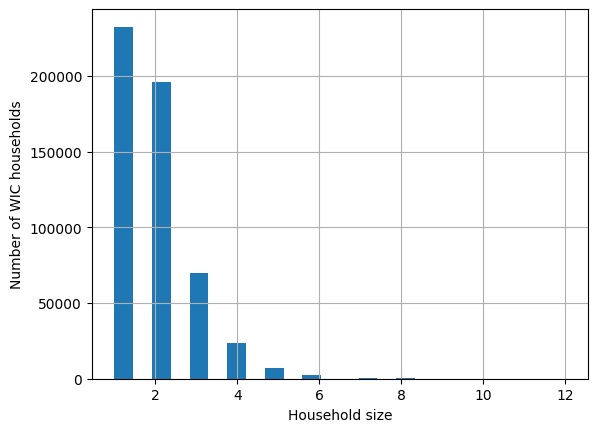

In [28]:
%%time
df_wic.groupby(['household_id'])['simulant_id'].nunique().hist(bins=24)
plt.xlabel("Household size")
plt.ylabel("Number of WIC households")

Text(0, 0.5, 'Number of WIC participants in age bin')

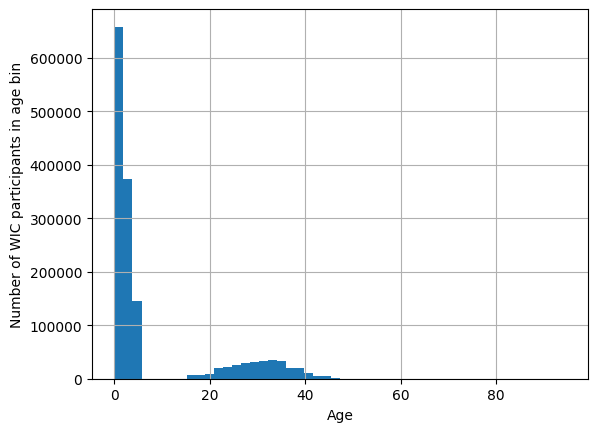

In [29]:
df_wic.age.hist(bins=50)
plt.xlabel("Age")
plt.ylabel("Number of WIC participants in age bin")

In [30]:
wic_dob = pd.to_datetime(df_wic.date_of_birth)
wic_dob

0         1999-08-12
1         1992-01-11
2         1994-05-31
3         1981-10-23
4         1992-09-12
             ...    
1490390   2030-01-07
1490391   2029-12-27
1490392   2029-12-30
1490393   2030-01-19
1490394   2030-01-20
Name: date_of_birth, Length: 1490395, dtype: datetime64[ns]

Text(0, 0.5, 'Number of WIC participants in DOB bin')

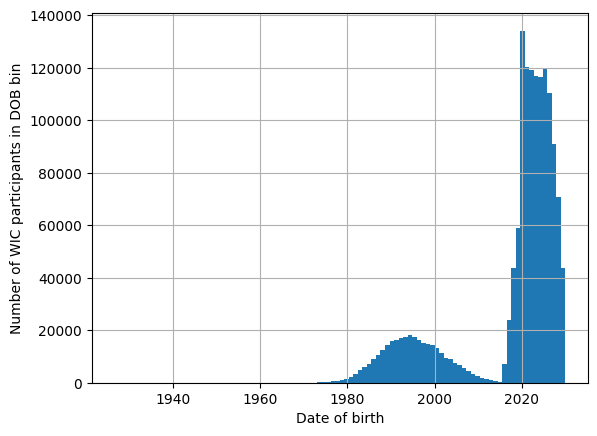

In [37]:
# The DOB distribution indicates that we have all WIC years in one dataframe
wic_dob.hist(bins=100)
plt.xlabel("Date of birth")
plt.ylabel("Number of WIC participants in DOB bin")

# Try the self-join to identify mother-child pairs

In [41]:
df_wic

,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,household_id,age,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number
0,Biological child,7359_37,Schindler,7359_-1,OH,43149.0,7359_-1,Female,1999-08-12,7359_22,21.328291,columbus,L,Emma,chaintree dr,White,13288,Standard,NaN
1,Reference person,7359_534,Baldez,7359_-1,TX,77979.0,7359_-1,Female,1992-01-11,7359_222,28.912082,galveston,B,Alexandria,appian cv,Latino,226,Standard,NaN
2,Opp-sex partner,7359_580,Grier,7359_-1,NC,27612.0,7359_-1,Female,1994-05-31,7359_235,26.525698,wilmington,M,Kayla,maple street,Black,1153,Standard,NaN
3,Reference person,7359_587,Stahl,7359_-1,CA,91101.0,7359_-1,Female,1981-10-23,7359_238,39.129105,vallejo,K,Julie,inglewood dr,White,401,Standard,NaN
4,Reference person,7359_668,Sepulveda Rosales,7359_-1,CA,93727.0,7359_-1,Female,1992-09-12,7359_266,28.240271,torrance,W,Cassandra,mcintosh park dr,Latino,623,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490390,Biological child,5020_1173735,Hernandez,5020_595381,CA,92061.0,5020_595382,Male,2030-01-07,5020_239404,0.044600,escondido,S,Bryson,clearview dr,Latino,28905,Standard,NaN
1490391,Other nonrelative,5020_1173736,Mendez,5020_-1,CA,95838.0,5020_618658,Female,2029-12-27,5020_71420,0.074165,corona,L,Amari,sw 5th st,Latino,39,Standard,NaN
1490392,Biological child,5020_1173741,Patel,5020_-1,TX,75482.0,5020_727232,Male,2029-12-30,5020_457474,0.067143,georgetown,I,Arlen,wheyfield drive,Asian,NaN,Standard,NaN
1490393,Biological child,5020_1173745,Brandel,5020_-1,CO,80127.0,5020_939518,Male,2030-01-19,5020_408935,0.011262,cortez,B,Arturo,flarestone ct,White,732,Standard,NaN


In [43]:
%%time
df_child_parent = df_wic.merge(
    df_wic, left_on='guardian_1', right_on='simulant_id',
    suffixes=['_child', '_guardian']
)
df_child_parent

CPU times: user 1.48 s, sys: 170 ms, total: 1.65 s
Wall time: 1.64 s


,relation_to_household_head_child,simulant_id_child,last_name_child,guardian_2_child,state_child,zipcode_child,guardian_1_child,sex_child,date_of_birth_child,household_id_child,...,household_id_guardian,age_guardian,city_guardian,middle_initial_guardian,first_name_guardian,street_name_guardian,race_ethnicity_guardian,street_number_guardian,housing_type_guardian,unit_number_guardian
0,Biological child,7359_365594,Rios Ramirez,7359_365593,TN,37098.0,7359_365592,Female,2005-01-26,7359_147158,...,7359_147158,36.599691,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN
1,Biological child,7359_365597,Rios Ramirez,7359_365593,TN,37098.0,7359_365592,Male,2018-07-25,7359_147158,...,7359_147158,36.599691,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN
2,Biological child,7359_1100814,Rios Ramirez,7359_365593,TN,37098.0,7359_365592,Male,2025-12-15,7359_147158,...,7359_147158,36.599691,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN
3,Biological child,7359_1100814,Rios Ramirez,7359_365593,GA,30040.0,7359_365592,Male,2025-12-15,7359_147158,...,7359_147158,36.599691,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN
4,Biological child,7359_687334,Gomez,7359_687338,NV,89509.0,7359_687333,Female,2003-03-17,7359_276596,...,7359_276596,39.785402,reno,C,Allison,s jefferson davis pkwy,Latino,NaN,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980734,Other nonrelative,5020_1173694,Castillo,5020_-1,AZ,85207.0,5020_1138423,Male,2029-12-31,5020_281923,...,5020_281923,38.657951,phoenix,A,Elizabeth,tall pne ln w,Latino,410,Standard,NaN
980735,Biological child,5020_1173698,Simon,5020_-1,NV,89103.0,5020_1145405,Female,2030-01-02,5020_566123,...,5020_566123,31.522785,henderson,A,Caitlin,e kingston av,Black,3960,Standard,NaN
980736,Grandchild,5020_1173701,Martinez-Cano,5020_-1,FL,32148.0,5020_1154720,Male,2030-01-04,5020_307279,...,5020_307279,24.812932,temple terrace,I,Kathryn,s vineyard,Latino,1924,Standard,NaN
980737,Biological child,5020_1173702,Alonso,5020_-1,WA,99301.0,5020_1156275,Female,2030-01-20,5020_579700,...,5020_579700,26.225984,everett,A,Katrina,deepwood dr,Latino,2725,Standard,NaN


In [46]:
df_child_parent.loc[0:3].T

,0,1,2,3
relation_to_household_head_child,Biological child,Biological child,Biological child,Biological child
simulant_id_child,7359_365594,7359_365597,7359_1100814,7359_1100814
last_name_child,Rios Ramirez,Rios Ramirez,Rios Ramirez,Rios Ramirez
guardian_2_child,7359_365593,7359_365593,7359_365593,7359_365593
state_child,TN,TN,TN,GA
zipcode_child,37098.0,37098.0,37098.0,30040.0
guardian_1_child,7359_365592,7359_365592,7359_365592,7359_365592
sex_child,Female,Male,Male,Male
date_of_birth_child,2005-01-26,2018-07-25,2025-12-15,2025-12-15
household_id_child,7359_147158,7359_147158,7359_147158,7359_147158


In [48]:
df_child_parent.query("simulant_id_guardian == '7359_365594'").T

,21570
relation_to_household_head_child,Grandchild
simulant_id_child,7359_1009863
last_name_child,Rios Ramirez
guardian_2_child,7359_-1
state_child,TN
zipcode_child,37098.0
guardian_1_child,7359_365594
sex_child,Female
date_of_birth_child,2020-10-24
household_id_child,7359_147158


# Test updated str -> int ID conversion

In [52]:
df_wic.guardian_1

0              7359_-1
1              7359_-1
2              7359_-1
3              7359_-1
4              7359_-1
              ...     
1490390    5020_595382
1490391    5020_618658
1490392    5020_727232
1490393    5020_939518
1490394    5020_983853
Name: guardian_1, Length: 1490395, dtype: object

In [51]:
datatypes.id_str_to_int(df_wic.guardian_1)

0                     -1
1                     -1
2                     -1
3                     -1
4                     -1
               ...      
1490390    5020000595382
1490391    5020000618658
1490392    5020000727232
1490393    5020000939518
1490394    5020000983853
Name: guardian_1, Length: 1490395, dtype: int64

In [57]:
df_wic.guardian_1.dtype == 'object'

True

In [58]:
%time df_wic.guardian_1.map(type).unique()

CPU times: user 111 ms, sys: 1.13 ms, total: 112 ms
Wall time: 109 ms


array([<class 'str'>], dtype=object)

In [59]:
_[0] == str

True

# Test updated datatype conversion code

In [93]:
%%time
df_wic2 = datatypes.load_csv_data(f'{output_dir}/wic_observer.csv.bz2')
df_wic2

CPU times: user 16.6 s, sys: 263 ms, total: 16.9 s
Wall time: 17 s


,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,household_id,age,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number
0,Biological child,7359_37,Schindler,7359_-1,OH,43149.0,7359_-1,Female,1999-08-12,7359_22,21.328291,columbus,L,Emma,chaintree dr,White,13288,Standard,NaN
1,Reference person,7359_534,Baldez,7359_-1,TX,77979.0,7359_-1,Female,1992-01-11,7359_222,28.912081,galveston,B,Alexandria,appian cv,Latino,226,Standard,NaN
2,Opp-sex partner,7359_580,Grier,7359_-1,NC,27612.0,7359_-1,Female,1994-05-31,7359_235,26.525698,wilmington,M,Kayla,maple street,Black,1153,Standard,NaN
3,Reference person,7359_587,Stahl,7359_-1,CA,91101.0,7359_-1,Female,1981-10-23,7359_238,39.129105,vallejo,K,Julie,inglewood dr,White,401,Standard,NaN
4,Reference person,7359_668,Sepulveda Rosales,7359_-1,CA,93727.0,7359_-1,Female,1992-09-12,7359_266,28.240271,torrance,W,Cassandra,mcintosh park dr,Latino,623,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490390,Biological child,5020_1173735,Hernandez,5020_595381,CA,92061.0,5020_595382,Male,2030-01-07,5020_239404,0.044600,escondido,S,Bryson,clearview dr,Latino,28905,Standard,NaN
1490391,Other nonrelative,5020_1173736,Mendez,5020_-1,CA,95838.0,5020_618658,Female,2029-12-27,5020_71420,0.074165,corona,L,Amari,sw 5th st,Latino,39,Standard,NaN
1490392,Biological child,5020_1173741,Patel,5020_-1,TX,75482.0,5020_727232,Male,2029-12-30,5020_457474,0.067143,georgetown,I,Arlen,wheyfield drive,Asian,NaN,Standard,NaN
1490393,Biological child,5020_1173745,Brandel,5020_-1,CO,80127.0,5020_939518,Male,2030-01-19,5020_408935,0.011262,cortez,B,Arturo,flarestone ct,White,732,Standard,NaN


In [94]:
sizemb(df_wic2)

499.539812

In [95]:
%time datatypes.convert_string_ids_to_ints(df_wic2)
%time sizemb(df_wic2)

CPU times: user 13 s, sys: 314 ms, total: 13.3 s
Wall time: 13.3 s
CPU times: user 146 ms, sys: 3.98 ms, total: 150 ms
Wall time: 150 ms


146.994308

In [96]:
df_wic2.dtypes

relation_to_household_head    category
simulant_id                      int64
last_name                     category
guardian_2                       int64
state                         category
zipcode                       category
guardian_1                       int64
sex                           category
date_of_birth                 category
household_id                     int64
age                            float32
city                          category
middle_initial                category
first_name                    category
street_name                   category
race_ethnicity                category
street_number                 category
housing_type                  category
unit_number                   category
dtype: object

# Try creating an address column from address subcolumns

If I want to concatenate categorical columns instead of string columns, I need to cast to dtype `'object'` first (not `str`)to fill in `NaN`s correctly.

In [97]:
df_wic2.dtypes

relation_to_household_head    category
simulant_id                      int64
last_name                     category
guardian_2                       int64
state                         category
zipcode                       category
guardian_1                       int64
sex                           category
date_of_birth                 category
household_id                     int64
age                            float32
city                          category
middle_initial                category
first_name                    category
street_name                   category
race_ethnicity                category
street_number                 category
housing_type                  category
unit_number                   category
dtype: object

In [106]:
df_wic2.unit_number.astype('object')

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1490390    NaN
1490391    NaN
1490392    NaN
1490393    NaN
1490394    NaN
Name: unit_number, Length: 1490395, dtype: object

In [153]:
%%time
address = (
    (
        # Cast to type object to preserve NaNs as floats to fill with ''
        df_wic2.street_number.astype('object').fillna('')
        + ' ' + df_wic2.street_name.astype('object').fillna('')
        + ' ' + df_wic2.unit_number.astype('object').fillna('')
    ).str.strip() # Remove trailing whitespace when there's no unit number
    + ', ' + df_wic2.city.astype(str)
    + ', ' + df_wic2.state.astype(str)
)
address

CPU times: user 2.15 s, sys: 502 ms, total: 2.65 s
Wall time: 2.65 s


0            13288 chaintree dr, columbus, OH
1                226 appian cv, galveston, TX
2           1153 maple street, wilmington, NC
3               401 inglewood dr, vallejo, CA
4          623 mcintosh park dr, torrance, CA
                          ...                
1490390     28905 clearview dr, escondido, CA
1490391              39 sw 5th st, corona, CA
1490392       wheyfield drive, georgetown, TX
1490393         732 flarestone ct, cortez, CO
1490394        112 barrington st, st paul, MN
Length: 1490395, dtype: object

In [108]:
sizemb(address)

132.907051

In [86]:
# What do unit numbers look like when added to the address?
address.loc[df_wic.unit_number.notna()]

9                 6808 se lakeside dr # 206, statesville, NC
15         98 mountain laurel ln apartment 3, newport new...
18                         17 nw 20th pl g f, georgetown, TX
32                  248 ashland ave apartment b28, indio, CA
34               1237 coppercreek drv apt # 221, norwood, NJ
                                 ...                        
1490346               10 w 4th st apt 72, unincorporated, FL
1490352                  2515 archwood dr 1 f, oceanside, CA
1490364            1350 route 350 unit # 65, los angeles, CA
1490377      1018 n market st 2nd fl # 202, ellicott cty, MD
1490383               9638 hwy 56 aptmnt 1018, allentown, PA
Length: 83281, dtype: object

In [109]:
address.nunique()

622782

In [110]:
# We can use a hash to create unique address IDs if we want
address.map(hash).nunique()

622782

In [111]:
sizemb(address.map(hash))

11.923304

# Add an address ID column

In [113]:
df_wic2['address_id'] = address.map(hash)
df_wic2

,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,household_id,age,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number,address_id
0,Biological child,7359000000037,Schindler,-1,OH,43149.0,-1,Female,1999-08-12,7359000000022,21.328291,columbus,L,Emma,chaintree dr,White,13288,Standard,NaN,-3997055278842830010
1,Reference person,7359000000534,Baldez,-1,TX,77979.0,-1,Female,1992-01-11,7359000000222,28.912081,galveston,B,Alexandria,appian cv,Latino,226,Standard,NaN,665983348470514514
2,Opp-sex partner,7359000000580,Grier,-1,NC,27612.0,-1,Female,1994-05-31,7359000000235,26.525698,wilmington,M,Kayla,maple street,Black,1153,Standard,NaN,-9041219870251835594
3,Reference person,7359000000587,Stahl,-1,CA,91101.0,-1,Female,1981-10-23,7359000000238,39.129105,vallejo,K,Julie,inglewood dr,White,401,Standard,NaN,1561506041472708896
4,Reference person,7359000000668,Sepulveda Rosales,-1,CA,93727.0,-1,Female,1992-09-12,7359000000266,28.240271,torrance,W,Cassandra,mcintosh park dr,Latino,623,Standard,NaN,-5167228122201861620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490390,Biological child,5020001173735,Hernandez,5020000595381,CA,92061.0,5020000595382,Male,2030-01-07,5020000239404,0.044600,escondido,S,Bryson,clearview dr,Latino,28905,Standard,NaN,5418061926629081526
1490391,Other nonrelative,5020001173736,Mendez,-1,CA,95838.0,5020000618658,Female,2029-12-27,5020000071420,0.074165,corona,L,Amari,sw 5th st,Latino,39,Standard,NaN,6969859875665235307
1490392,Biological child,5020001173741,Patel,-1,TX,75482.0,5020000727232,Male,2029-12-30,5020000457474,0.067143,georgetown,I,Arlen,wheyfield drive,Asian,NaN,Standard,NaN,-186309692911211534
1490393,Biological child,5020001173745,Brandel,-1,CO,80127.0,5020000939518,Male,2030-01-19,5020000408935,0.011262,cortez,B,Arturo,flarestone ct,White,732,Standard,NaN,6336735668837873621


# Add an observation date column

In [122]:
birthdate = pd.to_datetime(df_wic2.date_of_birth)
birthdate

0         1999-08-12
1         1992-01-11
2         1994-05-31
3         1981-10-23
4         1992-09-12
             ...    
1490390   2030-01-07
1490391   2029-12-27
1490392   2029-12-30
1490393   2030-01-19
1490394   2030-01-20
Name: date_of_birth, Length: 1490395, dtype: datetime64[ns]

In [129]:
DAYS_PER_YEAR = 365.25
observation_date = birthdate + pd.to_timedelta(df_wic2.age * DAYS_PER_YEAR, 'D')
observation_date.rename("observation_date", inplace=True)
observation_date

0         2020-12-09 03:47:54.147062400
1         2020-12-09 03:17:59.942284800
2         2020-12-08 12:15:57.994041600
3         2020-12-08 21:43:51.774931200
4         2020-12-08 18:12:43.948022400
                       ...             
1490390   2030-01-23 06:57:35.165635200
1490391   2030-01-23 02:07:34.874112000
1490392   2030-01-23 12:34:32.427984000
1490393   2030-01-23 02:43:31.171872000
1490394   2030-01-23 12:48:01.656432000
Name: observation_date, Length: 1490395, dtype: datetime64[ns]

Text(0, 0.5, 'number of WIC rows')

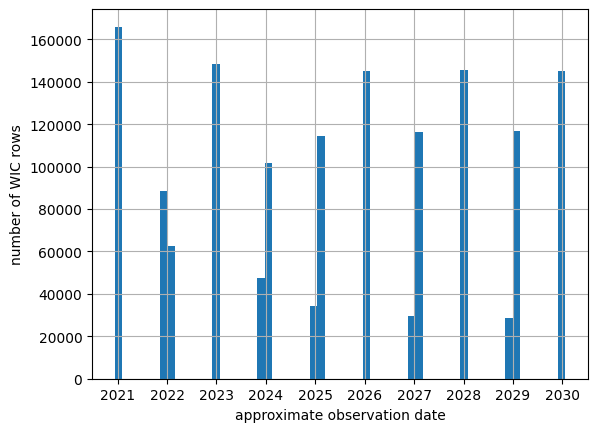

In [136]:
observation_date.hist(bins=60)
plt.xlabel("approximate observation date")
plt.ylabel("number of WIC rows")

<AxesSubplot: >

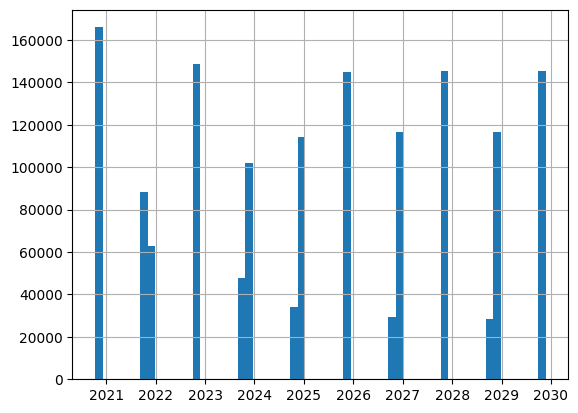

In [139]:
# Get the previous year by subtracting 60 days
(observation_date - pd.Timedelta(60, 'D')).hist(bins=60)

Text(0, 0.5, 'number of rows in WIC')

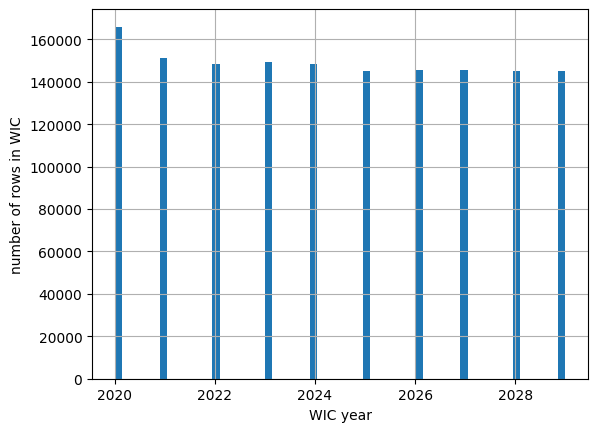

In [141]:
(observation_date - pd.Timedelta(60, 'D')).dt.year.hist(bins=60)
plt.xlabel('WIC year')
plt.ylabel('number of rows in WIC')

In [142]:
df_wic2['year'] = (observation_date - pd.Timedelta(60, 'D')).dt.year
df_wic2

,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,household_id,...,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number,address_id,year
0,Biological child,7359000000037,Schindler,-1,OH,43149.0,-1,Female,1999-08-12,7359000000022,...,columbus,L,Emma,chaintree dr,White,13288,Standard,NaN,-3997055278842830010,2020
1,Reference person,7359000000534,Baldez,-1,TX,77979.0,-1,Female,1992-01-11,7359000000222,...,galveston,B,Alexandria,appian cv,Latino,226,Standard,NaN,665983348470514514,2020
2,Opp-sex partner,7359000000580,Grier,-1,NC,27612.0,-1,Female,1994-05-31,7359000000235,...,wilmington,M,Kayla,maple street,Black,1153,Standard,NaN,-9041219870251835594,2020
3,Reference person,7359000000587,Stahl,-1,CA,91101.0,-1,Female,1981-10-23,7359000000238,...,vallejo,K,Julie,inglewood dr,White,401,Standard,NaN,1561506041472708896,2020
4,Reference person,7359000000668,Sepulveda Rosales,-1,CA,93727.0,-1,Female,1992-09-12,7359000000266,...,torrance,W,Cassandra,mcintosh park dr,Latino,623,Standard,NaN,-5167228122201861620,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490390,Biological child,5020001173735,Hernandez,5020000595381,CA,92061.0,5020000595382,Male,2030-01-07,5020000239404,...,escondido,S,Bryson,clearview dr,Latino,28905,Standard,NaN,5418061926629081526,2029
1490391,Other nonrelative,5020001173736,Mendez,-1,CA,95838.0,5020000618658,Female,2029-12-27,5020000071420,...,corona,L,Amari,sw 5th st,Latino,39,Standard,NaN,6969859875665235307,2029
1490392,Biological child,5020001173741,Patel,-1,TX,75482.0,5020000727232,Male,2029-12-30,5020000457474,...,georgetown,I,Arlen,wheyfield drive,Asian,NaN,Standard,NaN,-186309692911211534,2029
1490393,Biological child,5020001173745,Brandel,-1,CO,80127.0,5020000939518,Male,2030-01-19,5020000408935,...,cortez,B,Arturo,flarestone ct,White,732,Standard,NaN,6336735668837873621,2029


# Re-create merged child-guardian dataframe with year appended

980_739 rows

In [169]:
%%time
df_child_parent = df_wic2.merge(
    df_wic2, left_on='guardian_1', right_on='simulant_id',
    suffixes=['_child', '_guardian_1'],
)
df_child_parent

CPU times: user 410 ms, sys: 32.1 ms, total: 442 ms
Wall time: 440 ms


,relation_to_household_head_child,simulant_id_child,last_name_child,guardian_2_child,state_child,zipcode_child,guardian_1_child,sex_child,date_of_birth_child,household_id_child,...,city_guardian_1,middle_initial_guardian_1,first_name_guardian_1,street_name_guardian_1,race_ethnicity_guardian_1,street_number_guardian_1,housing_type_guardian_1,unit_number_guardian_1,address_id_guardian_1,year_guardian_1
0,Biological child,7359000365594,Rios Ramirez,7359000365593,TN,37098.0,7359000365592,Female,2005-01-26,7359000147158,...,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN,-6076341458975582082,2025
1,Biological child,7359000365597,Rios Ramirez,7359000365593,TN,37098.0,7359000365592,Male,2018-07-25,7359000147158,...,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN,-6076341458975582082,2025
2,Biological child,7359001100814,Rios Ramirez,7359000365593,TN,37098.0,7359000365592,Male,2025-12-15,7359000147158,...,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN,-6076341458975582082,2025
3,Biological child,7359001100814,Rios Ramirez,7359000365593,GA,30040.0,7359000365592,Male,2025-12-15,7359000147158,...,maryville,A,Juliet,wagner str,Latino,4093,Standard,NaN,-6076341458975582082,2025
4,Biological child,7359000687334,Gomez,7359000687338,NV,89509.0,7359000687333,Female,2003-03-17,7359000276596,...,reno,C,Allison,s jefferson davis pkwy,Latino,NaN,Standard,NaN,4544515786779243169,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980734,Other nonrelative,5020001173694,Castillo,-1,AZ,85207.0,5020001138423,Male,2029-12-31,5020000281923,...,phoenix,A,Elizabeth,tall pne ln w,Latino,410,Standard,NaN,8382687133825901545,2029
980735,Biological child,5020001173698,Simon,-1,NV,89103.0,5020001145405,Female,2030-01-02,5020000566123,...,henderson,A,Caitlin,e kingston av,Black,3960,Standard,NaN,-3430750250352275375,2029
980736,Grandchild,5020001173701,Martinez-Cano,-1,FL,32148.0,5020001154720,Male,2030-01-04,5020000307279,...,temple terrace,I,Kathryn,s vineyard,Latino,1924,Standard,NaN,-1298291175508382632,2029
980737,Biological child,5020001173702,Alonso,-1,WA,99301.0,5020001156275,Female,2030-01-20,5020000579700,...,everett,A,Katrina,deepwood dr,Latino,2725,Standard,NaN,-5003431868374952904,2029


In [144]:
temp = df_child_parent.query("household_id_child != household_id_guardian_1")
temp

,relation_to_household_head_child,simulant_id_child,last_name_child,guardian_2_child,state_child,zipcode_child,guardian_1_child,sex_child,date_of_birth_child,household_id_child,...,city_guardian_1,middle_initial_guardian_1,first_name_guardian_1,street_name_guardian_1,race_ethnicity_guardian_1,street_number_guardian_1,housing_type_guardian_1,unit_number_guardian_1,address_id_guardian_1,year_guardian_1
12,Other nonrelative,7359000002089,Montes,-1,TX,79110.0,7359000002086,Male,2018-12-15,7359000000838,...,van,V,Kaelah,w abbey view rd,Latino,816,Standard,NaN,-1291280191965920541,2026
13,Other nonrelative,7359000002089,Montes,-1,TX,79110.0,7359000002086,Male,2018-12-15,7359000000838,...,van,V,Kaelah,w abbey view rd,Latino,816,Standard,NaN,-1291280191965920541,2026
15,Other nonrelative,7359000002088,Rivera,-1,WI,54451.0,7359000002086,Female,2006-01-07,7359000062385,...,van,V,Kaelah,w abbey view rd,Latino,816,Standard,NaN,-1291280191965920541,2026
17,Other nonrelative,7359000002088,Rivera,-1,WI,54451.0,7359000002086,Female,2006-01-07,7359000062385,...,van,V,Kaelah,w abbey view rd,Latino,816,Standard,NaN,-1291280191965920541,2026
73,Biological child,7359000014577,Sunada,-1,TX,78390.0,7359000014574,Male,2019-06-20,7359000005836,...,rigby,D,Nicole,willard st,Latino,900,Standard,NaN,-6278462020191910523,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980355,Reference person,5020001170769,Owens,-1,MN,55805.0,5020000775135,Female,2029-11-02,5020000520494,...,red wing,A,Zoe,marigold,Black,217,Standard,unit 10037,2992878814692809478,2029
980370,Other nonrelative,5020001170836,Montoya,-1,CA,94520.0,5020000858398,Female,2029-11-14,5020000345199,...,cicero,A,Emily,alta vis dr,Latino,78965,Standard,NaN,919894996478160822,2029
980420,Other nonrelative,5020001171533,Hertel,-1,NY,11229.0,5020000071330,Female,2029-12-13,5020000423661,...,arlington,O,Ryley,lucy ln,White,12045,Standard,NaN,-5406374594962938707,2029
980424,Other nonrelative,5020001171555,Haley,-1,KY,40324.0,5020000091639,Male,2029-11-29,5020000036772,...,richland,E,Isabela,18th st,Black,1450,Standard,NaN,91256295594526260,2029


In [116]:
74104 / 980739 # 7.6% of pairs have mismatching household id

0.07555934861364746

In [147]:
temp.loc[12:17].T

,12,13,15,17
relation_to_household_head_child,Other nonrelative,Other nonrelative,Other nonrelative,Other nonrelative
simulant_id_child,7359000002089,7359000002089,7359000002088,7359000002088
last_name_child,Montes,Montes,Rivera,Rivera
guardian_2_child,-1,-1,-1,-1
state_child,TX,TX,WI,WI
zipcode_child,79110.0,79110.0,54451.0,54451.0
guardian_1_child,7359000002086,7359000002086,7359000002086,7359000002086
sex_child,Male,Male,Female,Female
date_of_birth_child,2018-12-15,2018-12-15,2006-01-07,2006-01-07
household_id_child,7359000000838,7359000000838,7359000062385,7359000062385


In [152]:
df_child_parent.query("simulant_id_guardian_1==7359000002086").T

,12,13,14,15,16,17
relation_to_household_head_child,Other nonrelative,Other nonrelative,Biological child,Other nonrelative,Biological child,Other nonrelative
simulant_id_child,7359000002089,7359000002089,7359001112844,7359000002088,7359001112844,7359000002088
last_name_child,Montes,Montes,Gomez,Rivera,Gomez,Rivera
guardian_2_child,-1,-1,-1,-1,-1,-1
state_child,TX,TX,TX,WI,TX,WI
zipcode_child,79110.0,79110.0,78526.0,54451.0,78526.0,54451.0
guardian_1_child,7359000002086,7359000002086,7359000002086,7359000002086,7359000002086,7359000002086
sex_child,Male,Male,Female,Female,Female,Female
date_of_birth_child,2018-12-15,2018-12-15,2026-08-13,2006-01-07,2026-08-13,2006-01-07
household_id_child,7359000000838,7359000000838,7359000430381,7359000062385,7359000430381,7359000062385


In [155]:
temp = df_child_parent.query(
    "age_child < 1"
    " and household_id_child != household_id_guardian_1"
    " and year_child == year_guardian_1"
)
temp

,relation_to_household_head_child,simulant_id_child,last_name_child,guardian_2_child,state_child,zipcode_child,guardian_1_child,sex_child,date_of_birth_child,household_id_child,...,city_guardian_1,middle_initial_guardian_1,first_name_guardian_1,street_name_guardian_1,race_ethnicity_guardian_1,street_number_guardian_1,housing_type_guardian_1,unit_number_guardian_1,address_id_guardian_1,year_guardian_1
398,Sibling,7359001016402,Estrada,-1,NY,10504.0,7359000151165,Female,2021-03-22,7359000060833,...,cross cut,S,Jenna,n 15th street,Latino,1825,Standard,NaN,7684496005452453274,2021
1078,Grandchild,7359001035636,Mejia,-1,CA,95307.0,7359000414831,Male,2022-04-21,7359000166894,...,fresno,B,Kirsten,e seneca ave,Latino,6340,Standard,NaN,-3906249775558842739,2022
2078,Other nonrelative,7359001132787,Ward,-1,CA,91362.0,7359000722908,Male,2027-09-23,7359000290942,...,new york city,D,Alexandria,supreme ave nw,Black,7566,Standard,NaN,-7700389383254421747,2027
2288,Sibling,7359001002116,Ochoa,7359000801034,AR,72032.0,7359000801033,Male,2020-05-24,7359000322132,...,seattle,R,Kaitlyn,sw 28 st,White,160,Standard,NaN,-6217068135383469750,2020
3578,Biological child,7359001001711,Mcduffie,7359000364521,MN,55112.0,7359000364520,Male,2020-05-09,7359000146717,...,rapid city,C,Elizabeth,hillshire loop,Black,7339,Standard,NaN,2520912060186501723,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980355,Reference person,5020001170769,Owens,-1,MN,55805.0,5020000775135,Female,2029-11-02,5020000520494,...,red wing,A,Zoe,marigold,Black,217,Standard,unit 10037,2992878814692809478,2029
980370,Other nonrelative,5020001170836,Montoya,-1,CA,94520.0,5020000858398,Female,2029-11-14,5020000345199,...,cicero,A,Emily,alta vis dr,Latino,78965,Standard,NaN,919894996478160822,2029
980420,Other nonrelative,5020001171533,Hertel,-1,NY,11229.0,5020000071330,Female,2029-12-13,5020000423661,...,arlington,O,Ryley,lucy ln,White,12045,Standard,NaN,-5406374594962938707,2029
980424,Other nonrelative,5020001171555,Haley,-1,KY,40324.0,5020000091639,Male,2029-11-29,5020000036772,...,richland,E,Isabela,18th st,Black,1450,Standard,NaN,91256295594526260,2029


In [157]:
temp.iloc[0:5].T

,398,1078,2078,2288,3578
relation_to_household_head_child,Sibling,Grandchild,Other nonrelative,Sibling,Biological child
simulant_id_child,7359001016402,7359001035636,7359001132787,7359001002116,7359001001711
last_name_child,Estrada,Mejia,Ward,Ochoa,Mcduffie
guardian_2_child,-1,-1,-1,7359000801034,7359000364521
state_child,NY,CA,CA,AR,MN
zipcode_child,10504.0,95307.0,91362.0,72032.0,55112.0
guardian_1_child,7359000151165,7359000414831,7359000722908,7359000801033,7359000364520
sex_child,Female,Male,Male,Male,Male
date_of_birth_child,2021-03-22,2022-04-21,2027-09-23,2020-05-24,2020-05-09
household_id_child,7359000060833,7359000166894,7359000290942,7359000322132,7359000146717


# See how many simulants were born in January of the year the data was recorded (i.e. the year after the data refers to)

In [161]:
df_wic2.query("@birthdate.dt.year > year")

,relation_to_household_head,simulant_id,last_name,guardian_2,state,zipcode,guardian_1,sex,date_of_birth,household_id,...,city,middle_initial,first_name,street_name,race_ethnicity,street_number,housing_type,unit_number,address_id,year
16228,Biological child,7359001012232,Stahl,7359000000588,CA,91101.0,7359000000587,Female,2021-01-01,7359000000238,...,vallejo,L,Nova,inglewood dr,White,401,Standard,NaN,1561506041472708896,2020
16229,Biological child,7359001012234,Neubert,-1,TX,76050.0,7359000003996,Male,2021-01-04,7359000001632,...,georgetown,R,Chase,nw 20th pl,White,17,Standard,g f,4280623797584935687,2020
16230,Biological child,7359001012240,Fitzsimmons,7359000010091,MN,56529.0,7359000010090,Male,2021-01-03,7359000004048,...,maple grove,C,Uriah,sw binford ave,White,14,Standard,NaN,-8571262168633025481,2020
16239,Biological child,7359001012268,Roberts,-1,IN,47909.0,7359000036036,Female,2021-01-04,7359000014497,...,manchester,A,Mia,s emma dr,White,18845,Standard,NaN,6510896938178355830,2020
16254,Biological child,7359001012308,Castaneda,7359000090300,IL,60647.0,7359000090303,Male,2021-01-03,7359000036344,...,darien,C,Weston,w tera lynn wy,Latino,225,Standard,NaN,-1660467791264417582,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490387,Other relative,5020001173727,Aquino,-1,NC,27260.0,5020000428331,Male,2030-01-20,5020000172058,...,mooresville,R,Lukas,94th pl n,Asian,6017,Standard,NaN,-6616035152381067925,2029
1490388,Biological child,5020001173729,Pittman,-1,WI,53072.0,5020000454858,Male,2030-01-02,5020000583918,...,glidden,V,Jermaine,sunset blvd,Black,3511,Standard,NaN,8165508625376339194,2029
1490390,Biological child,5020001173735,Hernandez,5020000595381,CA,92061.0,5020000595382,Male,2030-01-07,5020000239404,...,escondido,S,Bryson,clearview dr,Latino,28905,Standard,NaN,5418061926629081526,2029
1490393,Biological child,5020001173745,Brandel,-1,CO,80127.0,5020000939518,Male,2030-01-19,5020000408935,...,cortez,B,Arturo,flarestone ct,White,732,Standard,NaN,6336735668837873621,2029


# Plot distribution of household sizes again, but by year

CPU times: user 1.26 s, sys: 37.7 ms, total: 1.3 s
Wall time: 1.3 s


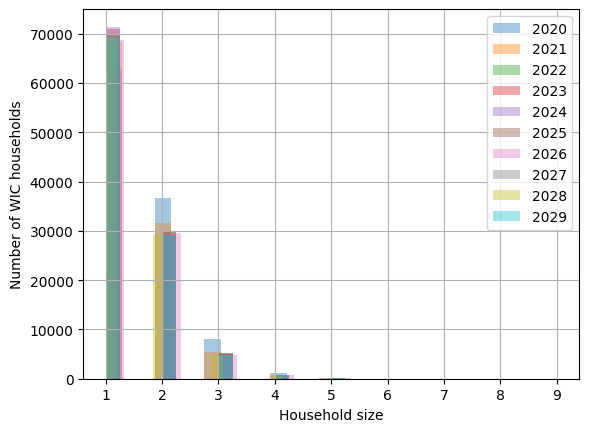

In [167]:
%%time
for year in range(2020, 2030):
    (
        df_wic2.loc[df_wic2.year==year]
        .groupby(['household_id'])['simulant_id'].nunique()
        .hist(bins=24, alpha=0.4, label=year)
    )
plt.xlabel("Household size")
plt.ylabel("Number of WIC households")
plt.legend();

# Check whether all mothers have an infant enrolled

In [170]:
is_mother = df_wic2.age > 5
df_wic2.loc[is_mother].age.describe()

count    315012.000000
mean         30.308004
std           6.568815
min           5.287375
25%          25.641618
50%          30.542580
75%          34.931926
max          94.488838
Name: age, dtype: float64

In [178]:
is_mother.sum()

315012

In [180]:
df_mother_child = df_wic2.loc[is_mother].merge(
    df_wic2, left_on=['simulant_id', 'year'], right_on=['guardian_1', 'year'],
    suffixes=['_mother', '_child'],
    how='left'
)
df_mother_child

,relation_to_household_head_mother,simulant_id_mother,last_name_mother,guardian_2_mother,state_mother,zipcode_mother,guardian_1_mother,sex_mother,date_of_birth_mother,household_id_mother,...,age_child,city_child,middle_initial_child,first_name_child,street_name_child,race_ethnicity_child,street_number_child,housing_type_child,unit_number_child,address_id_child
0,Biological child,7359000000037,Schindler,-1,OH,43149.0,-1,Female,1999-08-12,7359000000022,...,0.766598,columbus,I,Sandy,chaintree dr,White,13288,Standard,NaN,-3.997055e+18
1,Reference person,7359000000534,Baldez,-1,TX,77979.0,-1,Female,1992-01-11,7359000000222,...,0.279958,galveston,S,Lukas,appian cv,Latino,226,Standard,NaN,6.659833e+17
2,Opp-sex partner,7359000000580,Grier,-1,NC,27612.0,-1,Female,1994-05-31,7359000000235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Reference person,7359000000587,Stahl,-1,CA,91101.0,-1,Female,1981-10-23,7359000000238,...,4.165958,vallejo,B,Bailey,inglewood dr,White,401,Standard,NaN,1.561506e+18
4,Reference person,7359000000587,Stahl,-1,CA,91101.0,-1,Female,1981-10-23,7359000000238,...,0.015845,vallejo,L,Nova,inglewood dr,White,401,Standard,NaN,1.561506e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366473,Reference person,5020001157556,Lewis,-1,FL,33709.0,-1,Female,2002-11-14,5020000591546,...,0.198876,cape coral,A,Olivia,ducommun avenue,White,29,Standard,NaN,-8.849994e+18
366474,Grandchild,5020001158995,Seagraves,-1,CA,92571.0,-1,Female,1997-01-11,5020000025546,...,0.352008,santa monica,M,Kendall,alhambra st,White,18198,Standard,NaN,1.681367e+18
366475,Reference person,5020001159161,Daniele,-1,HI,96782.0,-1,Female,1991-09-18,5020000583189,...,0.788712,honolulu,A,Knox,thistledown road,White,1616,Standard,NaN,6.933198e+18
366476,Opp-sex spouse,5020001160638,Castro,-1,RI,2852.0,-1,Female,1989-02-02,5020000584942,...,0.067713,glocester,C,Madeline,caswell pl,Latino,21744,Standard,NaN,-1.043867e+18


In [181]:
df_mother_child.loc[:5].T

,0,1,2,3,4,5
relation_to_household_head_mother,Biological child,Reference person,Opp-sex partner,Reference person,Reference person,Reference person
simulant_id_mother,7359000000037,7359000000534,7359000000580,7359000000587,7359000000587,7359000000668
last_name_mother,Schindler,Baldez,Grier,Stahl,Stahl,Sepulveda Rosales
guardian_2_mother,-1,-1,-1,-1,-1,-1
state_mother,OH,TX,NC,CA,CA,CA
zipcode_mother,43149.0,77979.0,27612.0,91101.0,91101.0,93727.0
guardian_1_mother,-1,-1,-1,-1,-1,-1
sex_mother,Female,Female,Female,Female,Female,Female
date_of_birth_mother,1999-08-12,1992-01-11,1994-05-31,1981-10-23,1981-10-23,1992-09-12
household_id_mother,7359000000022,7359000000222,7359000000235,7359000000238,7359000000238,7359000000266


In [182]:
3

3

In [183]:
getsizeof('')

49

In [184]:
getsizeof(np.nan)

24

In [187]:
getsizeof(np.full(10000, ''))

40112

In [188]:
getsizeof(np.full(10000, np.nan))

80112

In [189]:
getsizeof(pd.Series(['']*10000))

570144

In [187]:
getsizeof(np.full(10000, ''))

40112

In [190]:
getsizeof(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), 10000))

40112

In [195]:
getsizeof(pd.Series('', range(10000)))

570144

In [191]:
getsizeof(pd.Series(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), 10000)))

580144

In [196]:
570144/40112

14.213801356202632

In [192]:
580144/40112

14.463103310729956

In [193]:
390/4

97.5

In [197]:
(49+4)*10000

530000

In [198]:
getsizeof(pd.Series(np.nan, range(10000)))

80144